# ***Exploration Data Analysis***

This notebook focus on the Data Exploration part where we will study each attributes, vizualize the data to understand their distribution and the cleanliness of these data. Then we will study the correlation between attributes and define which transformation seem promising

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno


## ***Quick Look at the Data Structure***

In [182]:
dataset = pd.read_csv('hotel_bookings.csv')
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [183]:
df = dataset.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### ***Observations***:

We immediately notice that most of our columns does not contains a lot of missing values apart agent and company columns that contains a lot. Country and children contains also a few missing values.

It is interesting to notice that some categorical columns type are represented by numbers. The dataset has already been encoded.

<Axes: >

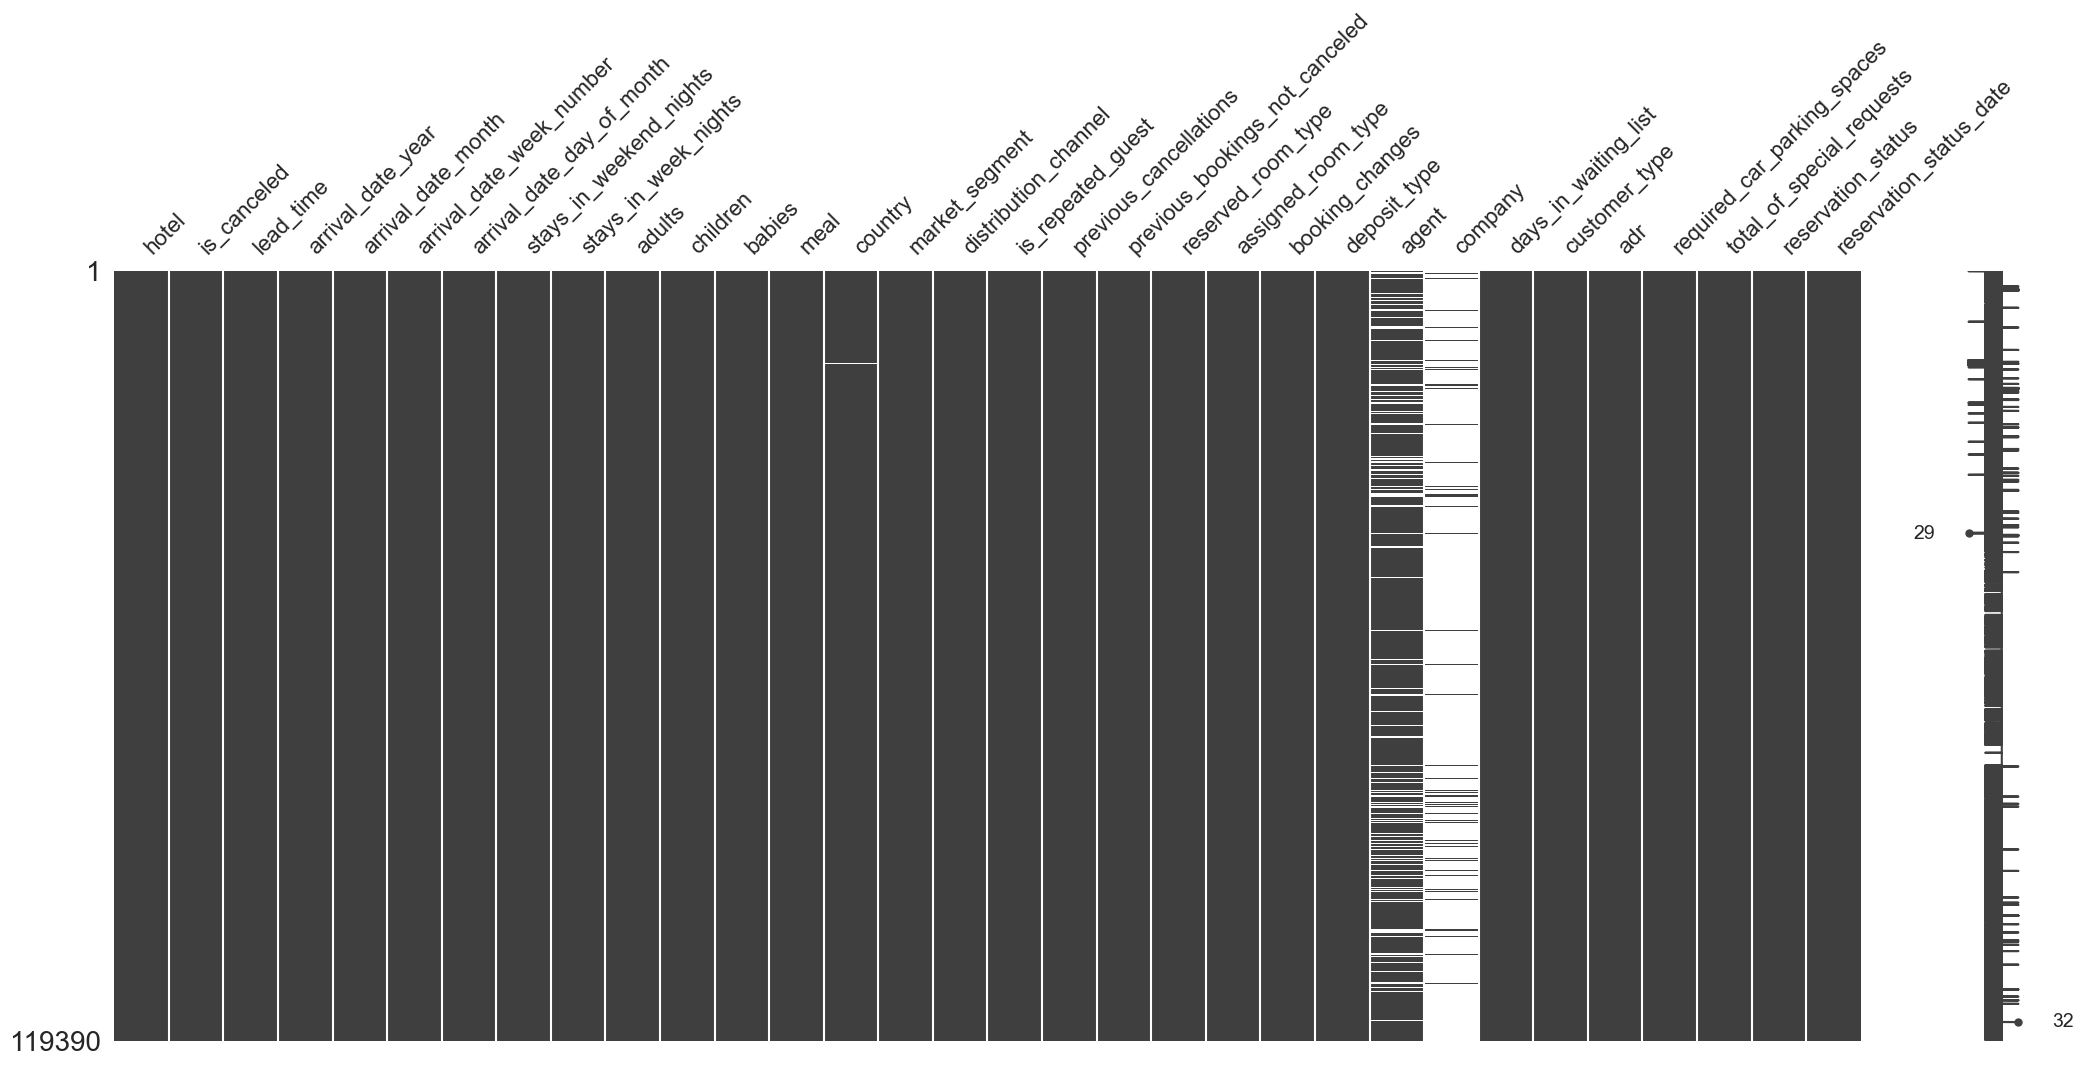

In [184]:
msno.matrix(df)

In [185]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### ***Observations***:

- We notice a value at 5400 for the adr column that has a mean of 100 and an interquartile range from 69 to 126. This value is an outlier that we will remove (the second highest value is 510).
- Children and babies columns max values are 10 for both, Adults column max value is 55. It seems a bit strange but knowing the fact that our dataset contains Groups booking as well we assume that these value are correct.

In [186]:
df = df[df['adr'] != 5400]
df = df[df['adr'] != -6.38]
df = df[df['adults'] < 1]

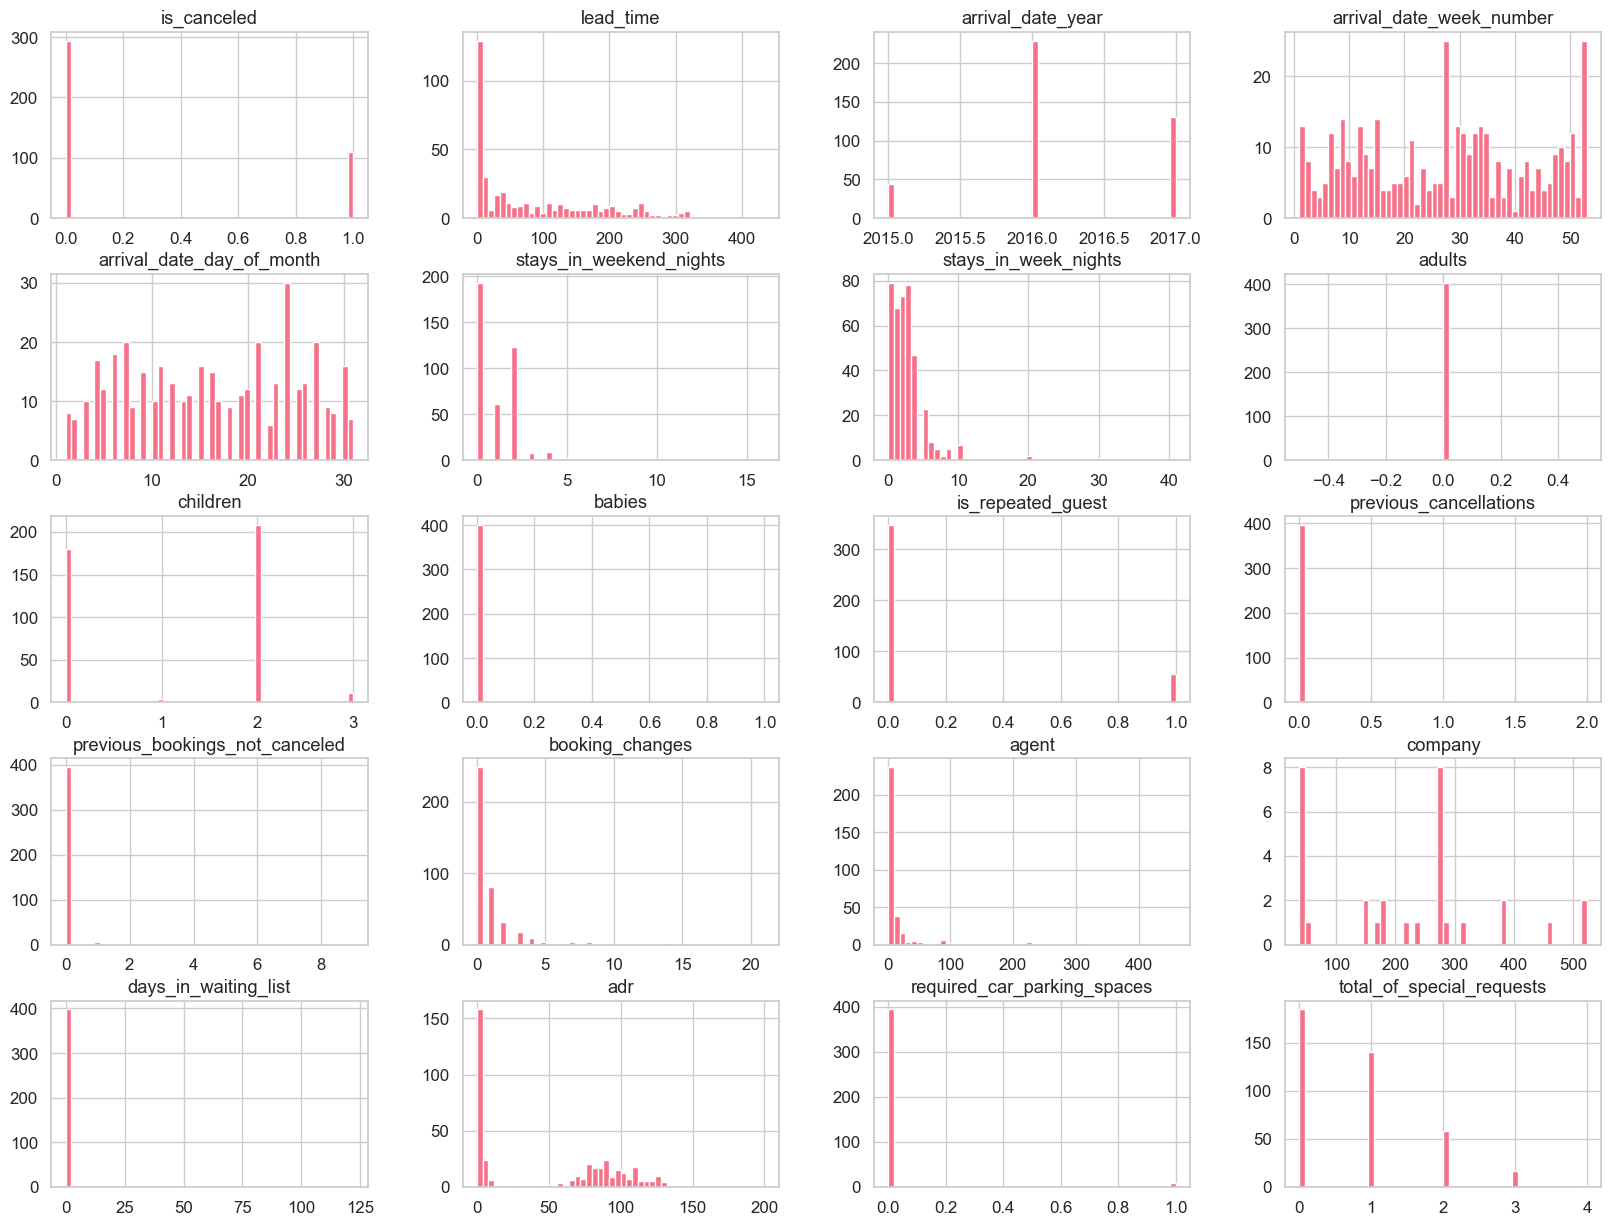

In [187]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### ***Observations***:

- About the company histogram: 2 companies are leading the market with a significant amount of bookings. Same for Agent
- Bookings have a seasonality. the number of bookings is increasing from January to summer and then decreasing until December but we notice a lot of bookings for New Year's
- More booking in 2016
- Most of the variables contains a lot of 0. 

In [188]:
pd.set_option('display.max_rows', None)
df.groupby('arrival_date_year')['arrival_date_week_number'].value_counts().sort_index()


arrival_date_year  arrival_date_week_number
2015               30                           2
                   33                           6
                   34                           1
                   35                           3
                   37                           4
                   39                           1
                   40                           1
                   41                           1
                   42                           4
                   43                           2
                   46                           1
                   47                           1
                   49                           2
                   50                           2
                   51                           2
                   52                           8
                   53                           3
2016               2                            4
                   3                            4
      

### ***Observations***:

This explain why we have more bookings in 2016. The dataset contains only data from June 2015 and before September 2017 so these years are not complete. It also give an explanation to the fact that most booking where in summer. Even if may have been thinking that it was because of the weather it's just a particularity of the dataset that contains 3 summer but not 3 full year.

### As datas are already well cleaned and encoded for most of them, I will not go so deep in the univariate analysis.

# ***Looking for Correlations***

In [189]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# encode categorical variables
for col in df.select_dtypes(include=['object']).columns:
    df.loc[:, col] = label_encoder.fit_transform(df[col])

# As these variable are categorical, we will use Spearman correlation, able to handle non-linear relationships
spearman_corr = df.corr(method='spearman')
print(spearman_corr['is_canceled'].sort_values(ascending=False))

is_canceled                       1.000000
company                           0.372940
reserved_room_type                0.307951
lead_time                         0.282732
children                          0.262468
adr                               0.189416
arrival_date_year                 0.110415
market_segment                    0.104762
distribution_channel              0.100534
stays_in_week_nights              0.091094
previous_cancellations            0.089228
country                           0.048631
stays_in_weekend_nights           0.019022
babies                            0.012256
total_of_special_requests        -0.027977
customer_type                    -0.033526
arrival_date_week_number         -0.033887
hotel                            -0.047935
assigned_room_type               -0.052833
days_in_waiting_list             -0.068245
arrival_date_month               -0.069837
arrival_date_day_of_month        -0.078234
previous_bookings_not_canceled   -0.086649
required_ca

## ***Observations***:

### Important Features:

- deposit_type is highly correlated with is_canceled: 0.477049
- lead_time is highly correlated with is_canceled: 0.316643
- previous_cancellations is correlated with is_canceled: 0.270238
- total_of_special_requests is negatively correlated with is_canceled: -0.258514
- required_car_parking_spaces is negatively correlated with is_canceled:  -0.197396

### Features that should be removed 
- Reservation_status: It's an evidence but reservation_status is highly correlated with is_canceled, by looking at the data we can even say that this colummn is in some way a data leakage. We will have to drop it. Anyway it does not have sense to predict if a booking is canceled while the reservation status is already as canceled. We want to predict before. 
- arrival_date_year: really small correlation and no sense in a real case as we will predict in real time on future datas. Moreover it's biased due to tha fact that we have 3 years including 2 incomplete years.

For now we will not go further. I'm not sure about the impact that may have each column on our future model and I don't want to remove a column that may be important. I choose to remove these column not only because they are not important but also because they are not relevant or too much biased.

# ***Deep Dive Into correlation***

By plotting variable against the target variable, we want to look at the impact of each variable on the target variable. 

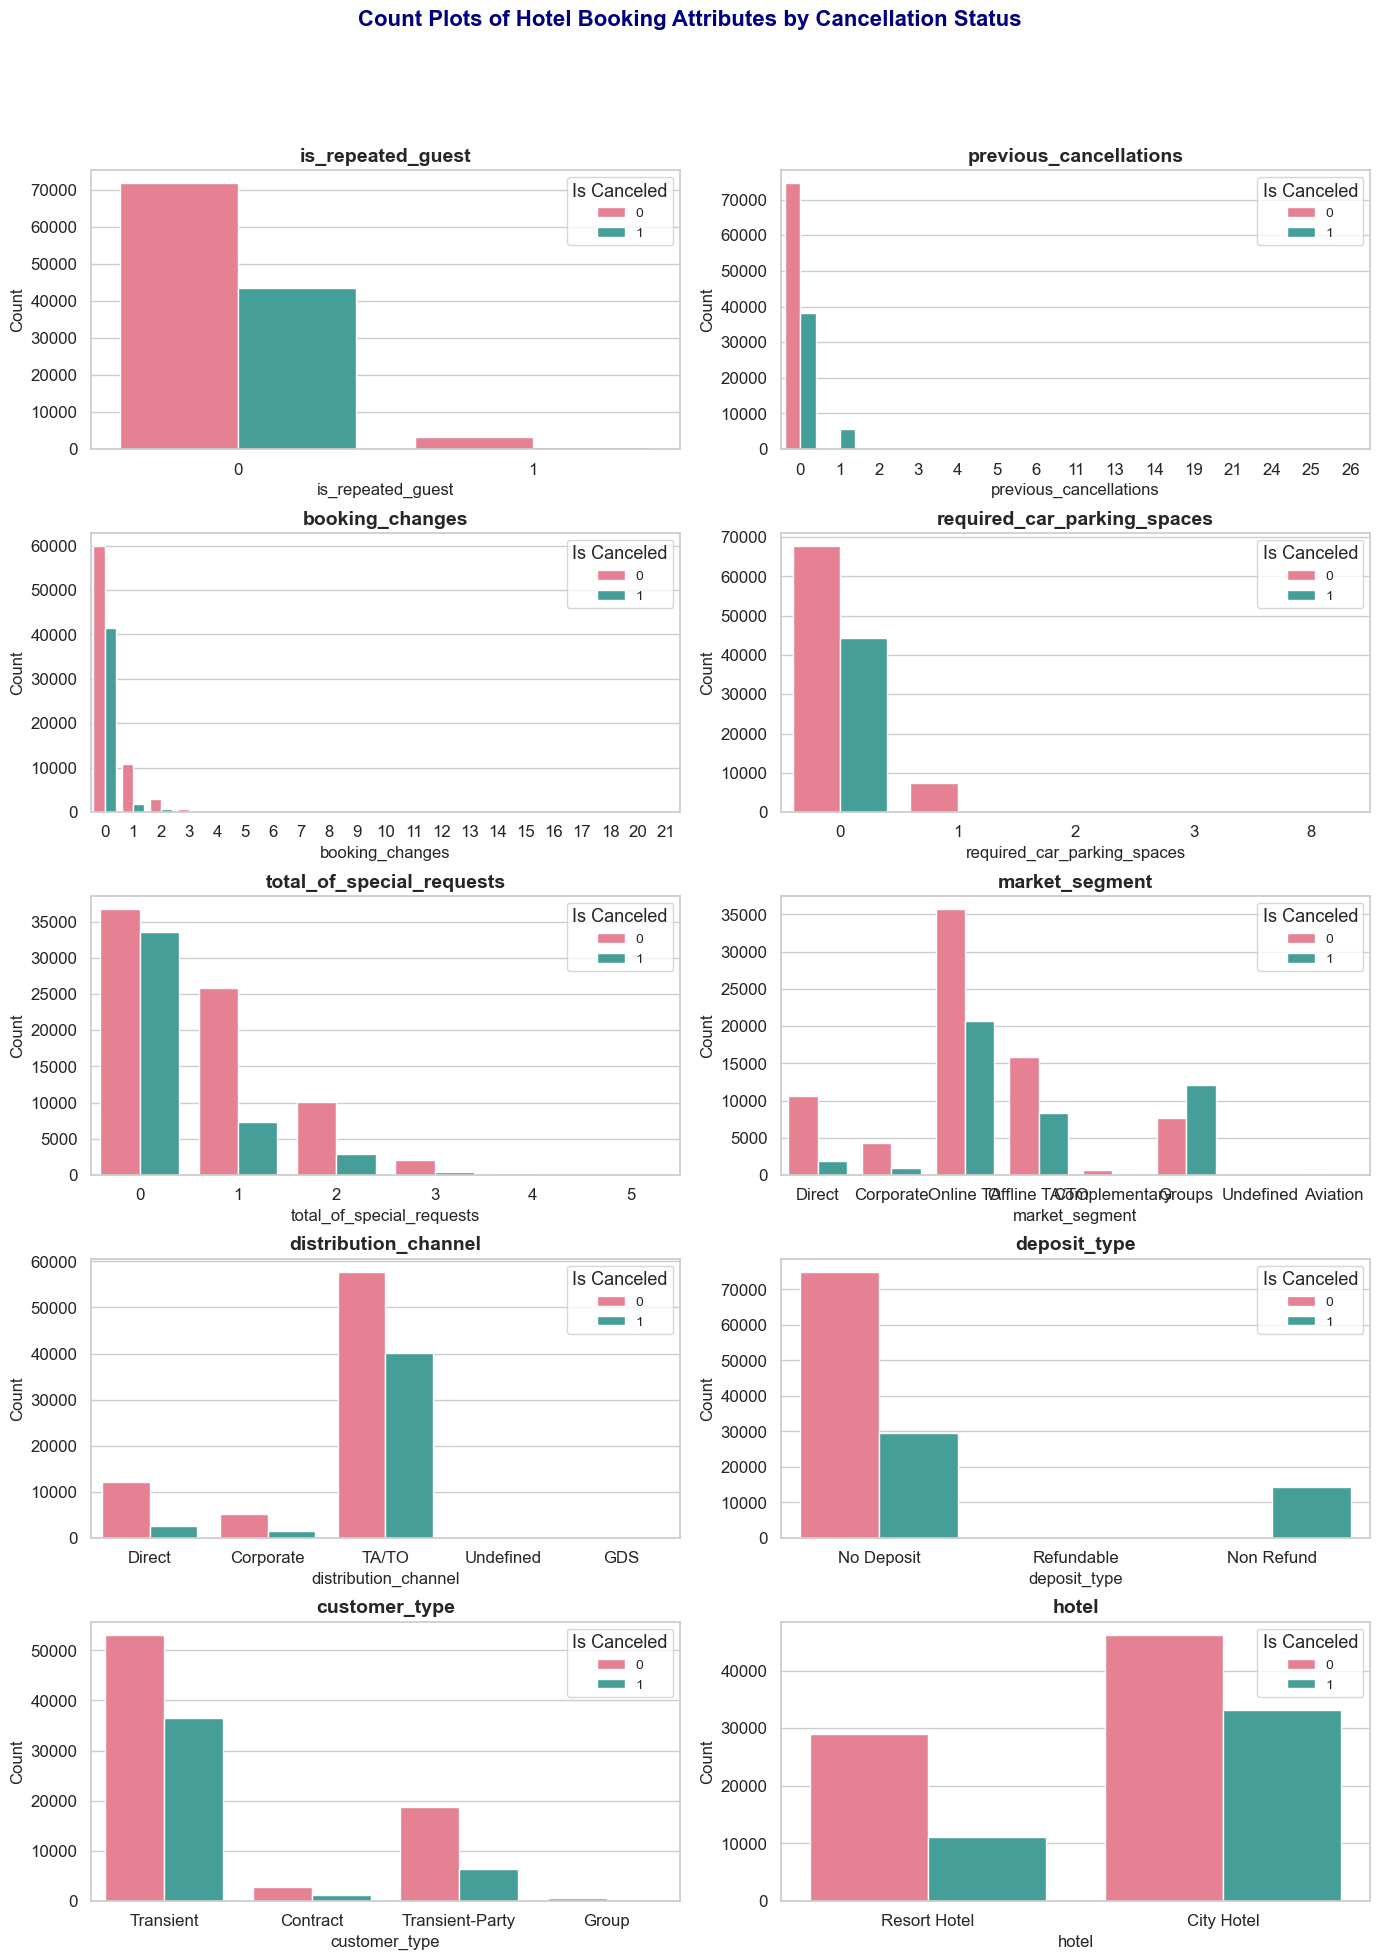

In [190]:
attributes = ['is_canceled' ,'is_repeated_guest', 'previous_cancellations', 'booking_changes', 'required_car_parking_spaces', 'total_of_special_requests', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'hotel']

# Définir une palette de couleurs personnalisée
palette = sns.color_palette("husl", 2)

# Configuration de l'affichage du graphique
sns.set(style="whitegrid", palette=palette, font_scale=1.1)

# Création de la grille de subplots
num_attributes = len(attributes[1:])  # len of attributes except 'is_canceled'
ncols = 2 
nrows = (num_attributes + ncols - 1) // ncols 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, nrows * 4)) 

# Aplatir les axes pour faciliter l'itération
axes = axes.flatten()

# Tracer un countplot pour chaque attribut
for i, attribute in enumerate(attributes[1:]):
    sns.countplot(x=attribute, hue='is_canceled', data=dataset, ax=axes[i])
    axes[i].set_title(attribute, fontsize=14, fontweight='bold')
    axes[i].legend(title='Is Canceled', loc='upper right', fontsize=10, title_fontsize='13')
    axes[i].set_xlabel(attribute, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)

# Supprimer les subplots inutilisés
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Ajuster l'espacement et afficher le graphique
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle('Count Plots of Hotel Booking Attributes by Cancellation Status', fontsize=16, fontweight='bold', color='navy')
plt.show()


### ***Observations***:

- Most of previous cancellations are 0 or 1 but we have some "recurrent cancellers"
- When a reservation is cancelled no parking space is required
- The deposit type has a huge impact, .
- Cancellation percentage decrease with the number of special requests
- Group cancel more than others, Direct booking cancel less 


# ***Lead Time and Cancellation***

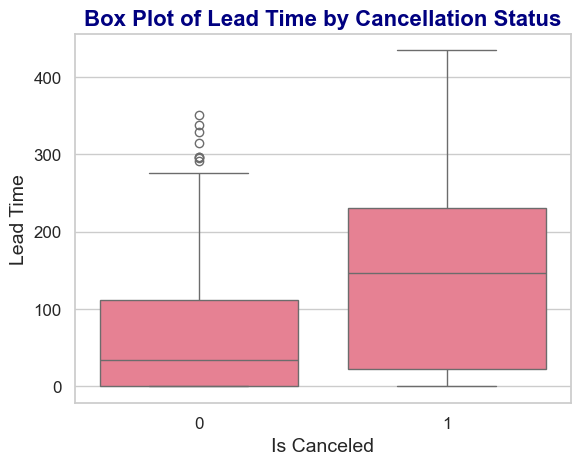

In [191]:
# box plot of lead time by cancellation status
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title('Box Plot of Lead Time by Cancellation Status', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Is Canceled', fontsize=14)
plt.ylabel('Lead Time', fontsize=14)

plt.show()


### ***Observations***:

- The longer the lead time the more likely the booking will be canceled
- A longer period between booking and arrival date lead to more possibility of unpredicted events that may lead to a cancellation

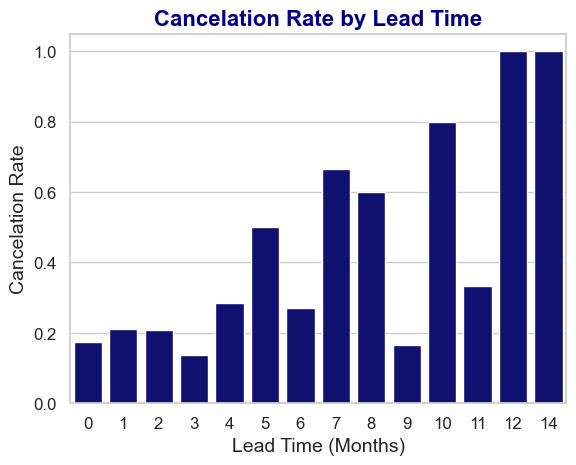

In [192]:
df['lead_time_months'] = df['lead_time'] // 30
df['lead_time_months'] = df['lead_time_months'].astype(int)

cancel_rate_by_lead_time = df.groupby('lead_time_months')['is_canceled'].mean().reset_index()

sns.barplot(x='lead_time_months', y='is_canceled', data=cancel_rate_by_lead_time, color='navy')

plt.title('Cancelation Rate by Lead Time', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Lead Time (Months)', fontsize=14)
plt.ylabel('Cancelation Rate', fontsize=14)
plt.show()
 

### ***Observations***:

- We notice that above 7 month the cancellation rate increase significantly. 

# ***Deposit Type and Cancellation***

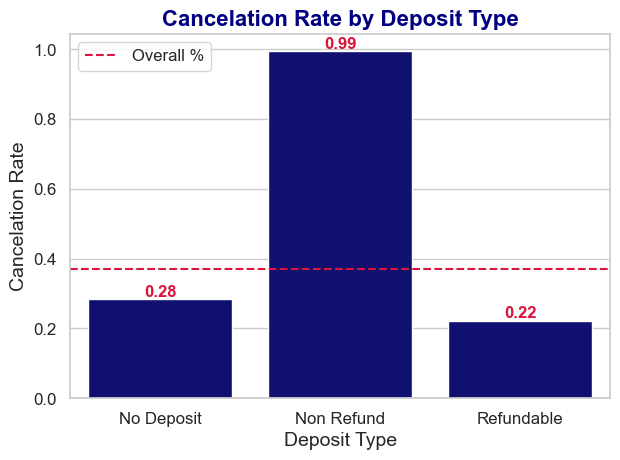

In [193]:
cancel_rate_by_deposit_type = dataset.groupby('deposit_type')['is_canceled'].mean().reset_index()

sns.barplot(x='deposit_type', y='is_canceled', data=cancel_rate_by_deposit_type, color='navy')

for i, rate in enumerate(cancel_rate_by_deposit_type['is_canceled']):
    plt.text(i, rate, '{:.2f}'.format(rate), ha='center', va='bottom', fontsize=12, fontweight='bold', color='crimson')

plt.title('Cancelation Rate by Deposit Type', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Deposit Type', fontsize=14)
plt.ylabel('Cancelation Rate', fontsize=14)
plt.tight_layout()

# add a line for the overall cancelation rate
plt.axhline(y=dataset['is_canceled'].mean(), color='crimson', linestyle='--', label='Overall %')
plt.legend(loc='upper left', fontsize=12)
plt.show()

### ***Observations***:

- Non refundable deposit type has a cancellation rate of 99%, it's a really important feature
- Others deposit type have a cancellation rate under the average cancellation rate
- The fact that Non refundable deposit type has a cancellation rate of 99% is a bit strange. How to explain that people cancel more when they can't be refunded than without deposit ? 

# ***Number of Previous Cancellations and Cancellation***

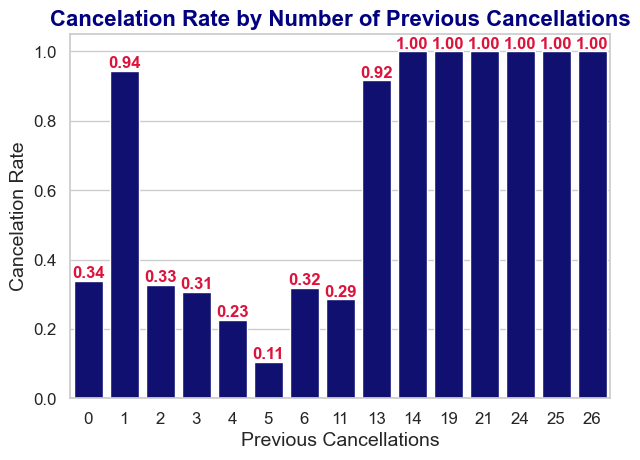

In [194]:
# plot cancellation rate by number of previous cancellations

cancel_rate_by_prev_cancel = dataset.groupby('previous_cancellations')['is_canceled'].mean().reset_index()

sns.barplot(x='previous_cancellations', y='is_canceled', data=cancel_rate_by_prev_cancel, color='navy')

for i, rate in enumerate(cancel_rate_by_prev_cancel['is_canceled']):
    plt.text(i, rate, '{:.2f}'.format(rate), ha='center', va='bottom', fontsize=12, fontweight='bold', color='crimson')
    
plt.title('Cancelation Rate by Number of Previous Cancellations', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Previous Cancellations', fontsize=14)
plt.ylabel('Cancelation Rate', fontsize=14)
plt.tight_layout()
plt.show()



In [195]:
# Create IsPortugal column 
dataset['IsPortugal'] = dataset['country'].apply(lambda x: 1 if x == 'PRT' else 0)

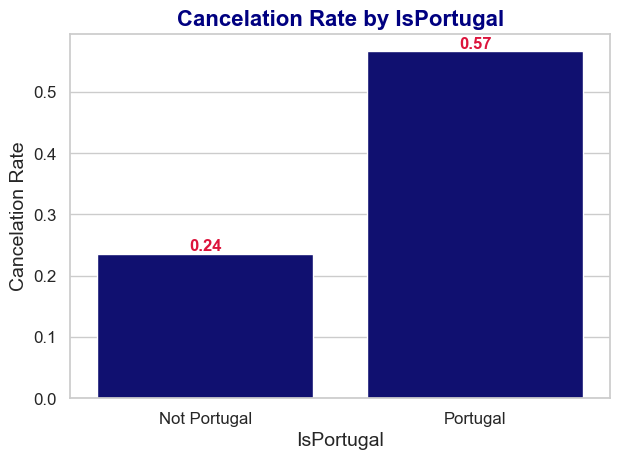

In [196]:
cancel_rate_by_prev_cancel = dataset.groupby('IsPortugal')['is_canceled'].mean().reset_index()

sns.barplot(x='IsPortugal', y='is_canceled', data=cancel_rate_by_prev_cancel, color='navy')

for i, rate in enumerate(cancel_rate_by_prev_cancel['is_canceled']):
    plt.text(i, rate, '{:.2f}'.format(rate), ha='center', va='bottom', fontsize=12, fontweight='bold', color='crimson')
    
plt.title('Cancelation Rate by IsPortugal', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('IsPortugal', fontsize=14)
plt.ylabel('Cancelation Rate', fontsize=14)
plt.xticks([0,1], ['Not Portugal', 'Portugal'])
plt.tight_layout()
plt.show()

### ***Observations***:

- People from Portugal are more likely to cancel their booking
- It's probable that people from Portugal does not need to book a plane too. They can cancel their booking more easily than people from other countries.

In [197]:
# create a column country group with 3 groups: Portugal, close to portugal, and Other

def country_group(country):
    if country == 'PRT':
        return 'Portugal'
    elif country in ['ESP', 'FRA', 'DEU', 'GBR', 'IRL', 'BEL', 'NLD', 'CHE', 'AUT']:
        return 'Close to Portugal'
    else:
        return 'Other'
    
dataset['country_group'] = dataset['country'].apply(country_group)

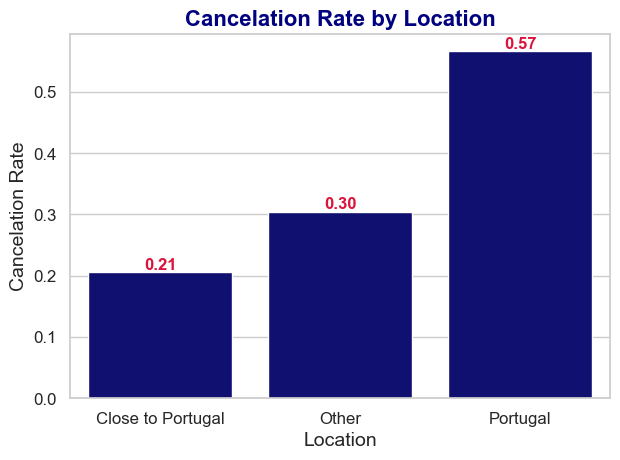

In [198]:
cancel_rate_by_prev_cancel = dataset.groupby('country_group')['is_canceled'].mean().reset_index()

sns.barplot(x='country_group', y='is_canceled', data=cancel_rate_by_prev_cancel, color='navy')

for i, rate in enumerate(cancel_rate_by_prev_cancel['is_canceled']):
    plt.text(i, rate, '{:.2f}'.format(rate), ha='center', va='bottom', fontsize=12, fontweight='bold', color='crimson')
    
plt.title('Cancelation Rate by Location', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Location', fontsize=14)
plt.ylabel('Cancelation Rate', fontsize=14)
plt.tight_layout()
plt.show()

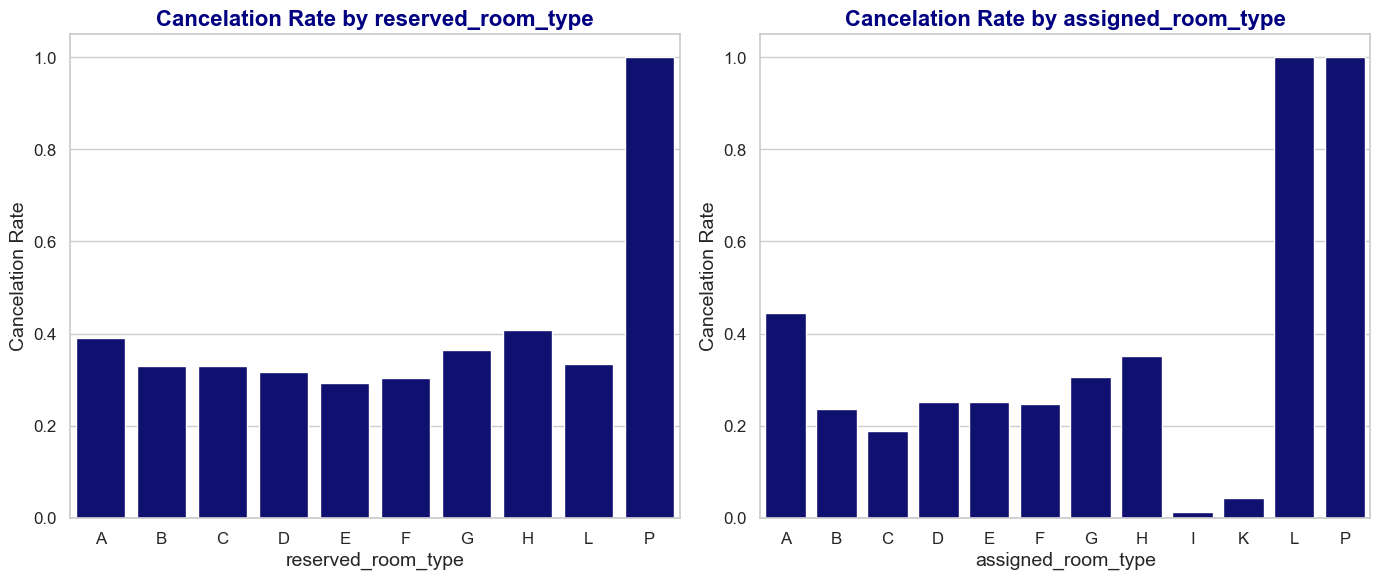

In [199]:
# reserved room type vs is_canceled subplot left, atributed room type vs is_canceled subplot right

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
cancel_rate_by_prev_cancel = dataset.groupby('reserved_room_type')['is_canceled'].mean().reset_index()

sns.barplot(x='reserved_room_type', y='is_canceled', data=cancel_rate_by_prev_cancel, color='navy')
 
plt.title('Cancelation Rate by reserved_room_type', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('reserved_room_type', fontsize=14)
plt.ylabel('Cancelation Rate', fontsize=14)

cancel_rate_by_prev_cancel = dataset.groupby('assigned_room_type')['is_canceled'].mean().reset_index()

plt.subplot(1, 2, 2)
sns.barplot(x='assigned_room_type', y='is_canceled', data=cancel_rate_by_prev_cancel, color='navy')

plt.title('Cancelation Rate by assigned_room_type', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('assigned_room_type', fontsize=14)
plt.ylabel('Cancelation Rate', fontsize=14)

plt.tight_layout()
plt.show()


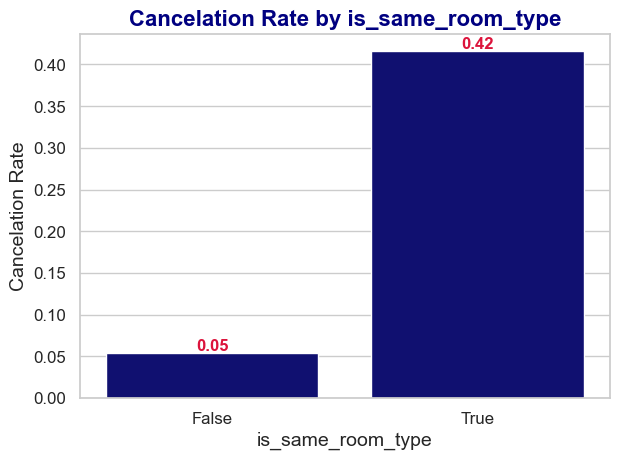

In [200]:
# create is_same_room_type column

dataset['is_same_room_type'] = dataset['reserved_room_type'] == dataset['assigned_room_type']

cancel_rate_by_prev_cancel = dataset.groupby('is_same_room_type')['is_canceled'].mean().reset_index()

sns.barplot(x='is_same_room_type', y='is_canceled', data=cancel_rate_by_prev_cancel, color='navy')

for i, rate in enumerate(cancel_rate_by_prev_cancel['is_canceled']):
    plt.text(i, rate, '{:.2f}'.format(rate), ha='center', va='bottom', fontsize=12, fontweight='bold', color='crimson')

plt.title('Cancelation Rate by is_same_room_type', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('is_same_room_type', fontsize=14)
plt.ylabel('Cancelation Rate', fontsize=14)
plt.tight_layout()
plt.show()

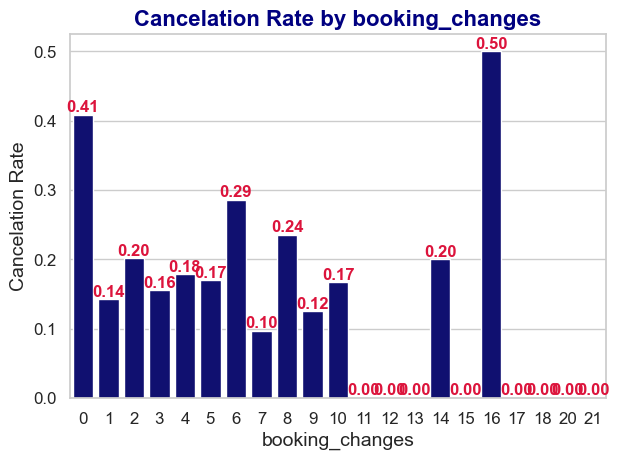

In [201]:
# cancelation rate by booking changes

cancel_rate_by_prev_cancel = dataset.groupby('booking_changes')['is_canceled'].mean().reset_index()

sns.barplot(x='booking_changes', y='is_canceled', data=cancel_rate_by_prev_cancel, color='navy')

for i, rate in enumerate(cancel_rate_by_prev_cancel['is_canceled']):
    plt.text(i, rate, '{:.2f}'.format(rate), ha='center', va='bottom', fontsize=12, fontweight='bold', color='crimson')

plt.title('Cancelation Rate by booking_changes', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('booking_changes', fontsize=14)
plt.ylabel('Cancelation Rate', fontsize=14)
plt.tight_layout()
plt.show()


In [202]:
dataset['booking_changes'].value_counts()

booking_changes
0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
16         2
17         2
12         2
11         2
20         1
21         1
18         1
Name: count, dtype: int64

### ***Observations***:

- We notice that when at least one change is made the cancellation rate decrease significantly.
- As some categoriess contains just some rows and as the cancelation % is almost the same for each category where the number of change is > 1 we could consider to create a column IsChangeMade that will be 1 if at least one change is made and 0 otherwise.

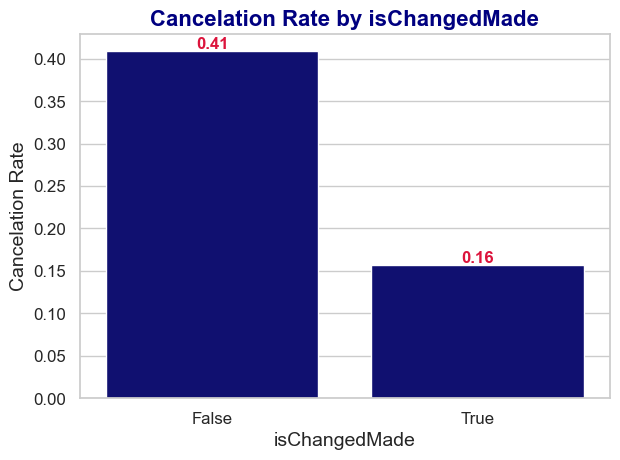

In [203]:
# create isChangedMade column

dataset['isChangedMade'] = dataset['booking_changes'] > 0

cancel_rate_by_prev_cancel = dataset.groupby('isChangedMade')['is_canceled'].mean().reset_index()

sns.barplot(x='isChangedMade', y='is_canceled', data=cancel_rate_by_prev_cancel, color='navy')

for i, rate in enumerate(cancel_rate_by_prev_cancel['is_canceled']):
    plt.text(i, rate, '{:.2f}'.format(rate), ha='center', va='bottom', fontsize=12, fontweight='bold', color='crimson')
    
plt.title('Cancelation Rate by isChangedMade', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('isChangedMade', fontsize=14)
plt.ylabel('Cancelation Rate', fontsize=14)
plt.tight_layout()
plt.show()

In [217]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df = dataset.copy()

df = df[df['adr'] != 5400]
df = df[df['adr'] != -6.38]
df = df[df['adults'] > 0]


# add all the column created to df
df['IsPortugal'] = dataset['country'].apply(lambda x: 1 if x == 'PRT' else 0)
df['country_group'] = df['country'].apply(country_group)
df['is_same_room_type'] = df['reserved_room_type'] == df['assigned_room_type']
df['isChangedMade'] = df['booking_changes'] > 0
df['IsGroup'] = df['market_segment'] == 'Groups'
df['IsAgentNaN'] = df['agent'].isna()
df['IsCompanyNaN'] = df['company'].isna()


label_encoder = LabelEncoder()

# encode categorical variables
for col in df.select_dtypes(include=['object']).columns:
    df.loc[:, col] = label_encoder.fit_transform(df[col])

# As these variable are categorical, we will use Spearman correlation, able to handle non-linear relationships
spearman_corr = df.corr(method='spearman')
print(spearman_corr['is_canceled'].sort_values(ascending=False))

is_canceled                       1.000000
deposit_type                      0.477613
country_group                     0.338599
IsPortugal                        0.337671
lead_time                         0.316671
previous_cancellations            0.270537
country                           0.257709
is_same_room_type                 0.246669
IsGroup                           0.222277
distribution_channel              0.173830
IsCompanyNaN                      0.099819
days_in_waiting_list              0.098517
adults                            0.066109
adr                               0.049893
stays_in_week_nights              0.041220
market_segment                    0.026193
arrival_date_year                 0.017864
arrival_date_week_number          0.007772
arrival_date_month               -0.001320
children                         -0.003149
stays_in_weekend_nights          -0.004162
arrival_date_day_of_month        -0.005913
meal                             -0.013942
company    

### ***Observations***:

- Columns that we created are all among the most correlated features, it's a good sign that our feature engineering is good.
- IsPortugal and country_group are too close to each others. Country group does not really bring new information so I'm going to drop it.

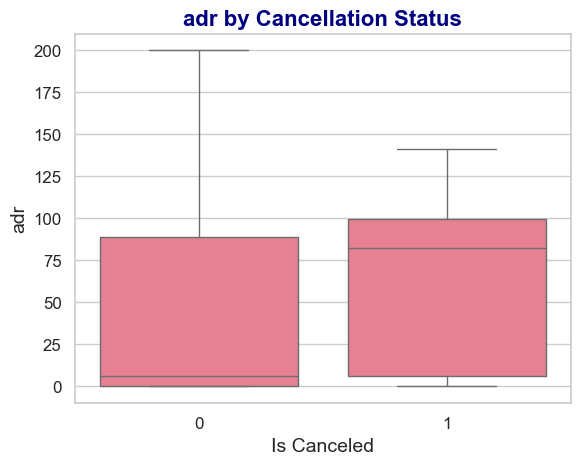

In [172]:
sns.boxplot(x='is_canceled', y='adr', data=df)
plt.title('adr by Cancellation Status', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Is Canceled', fontsize=14)
plt.ylabel('adr', fontsize=14)

plt.show()

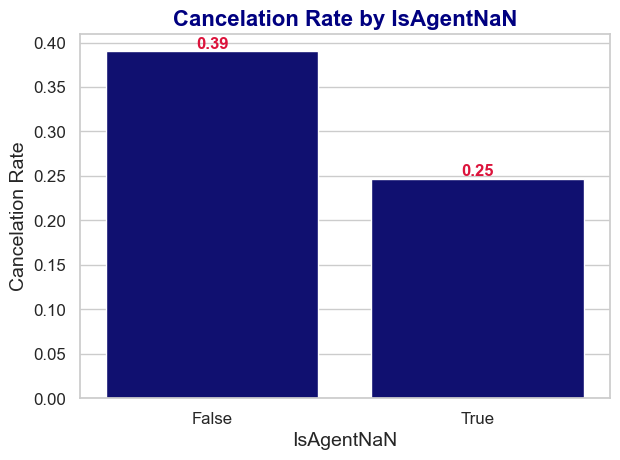

In [214]:
# create IsAgentNaN column

dataset['IsAgentNaN'] = dataset['agent'].isna()

cancel_rate_by_prev_cancel = dataset.groupby('IsAgentNaN')['is_canceled'].mean().reset_index()

sns.barplot(x='IsAgentNaN', y='is_canceled', data=cancel_rate_by_prev_cancel, color='navy')

for i, rate in enumerate(cancel_rate_by_prev_cancel['is_canceled']):
    plt.text(i, rate, '{:.2f}'.format(rate), ha='center', va='bottom', fontsize=12, fontweight='bold', color='crimson')

plt.title('Cancelation Rate by IsAgentNaN', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('IsAgentNaN', fontsize=14)
plt.ylabel('Cancelation Rate', fontsize=14)
plt.tight_layout()
plt.show()

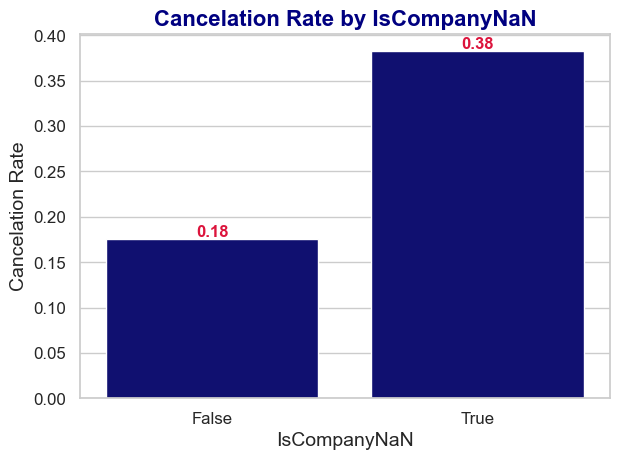

In [215]:
# create IsAgentNaN column

dataset['IsCompanyNaN'] = dataset['company'].isna()

cancel_rate_by_prev_cancel = dataset.groupby('IsCompanyNaN')['is_canceled'].mean().reset_index()

sns.barplot(x='IsCompanyNaN', y='is_canceled', data=cancel_rate_by_prev_cancel, color='navy')

for i, rate in enumerate(cancel_rate_by_prev_cancel['is_canceled']):
    plt.text(i, rate, '{:.2f}'.format(rate), ha='center', va='bottom', fontsize=12, fontweight='bold', color='crimson')

plt.title('Cancelation Rate by IsCompanyNaN', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('IsCompanyNaN', fontsize=14)
plt.ylabel('Cancelation Rate', fontsize=14)
plt.tight_layout()
plt.show()